In [14]:
# Import necessary libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier     

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# Import metrics for evaluation
from sklearn.metrics import roc_curve, auc, f1_score

# smote for handling imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
# Set random seed for reproducibility
np.random.seed(42)


## Loading the processed Datasets

In [15]:
# Load the datasets
frequency_encoded = pd.read_csv('Data/Processed Data/frequency_encoded_data.csv')
one_hot_encoded = pd.read_csv('Data/Processed Data/one_hot_encoded_data.csv')
target_encoded = pd.read_csv('Data/Processed Data/target_encoded_data.csv')

datasets = {
    'Frequency Encoded': frequency_encoded,
    'One-Hot Encoded': one_hot_encoded,
    'Target Encoded': target_encoded
}

results={
    'Frequency Encoded': {},
    'One-Hot Encoded': {},
    'Target Encoded': {}
}

In [ ]:
models = {
    'Random Forest':   RandomForestClassifier(n_estimators=100, random_state=42)   
    ,
    'AdaBoost':   AdaBoostClassifier(algorithm='SAMME',n_estimators=100, random_state=42)
    
    ,
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss',n_estimators=50)
}

### Frequency Encoded

In [17]:
X = frequency_encoded.drop(columns=['Class/ASD'])
y = frequency_encoded['Class/ASD']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote = ADASYN(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_orig, y_train_orig)

In [18]:
for model_name, model in models.items():
    results['Frequency Encoded'][model_name] = {}
    
    # Train and evaluate before SMOTE
    model.fit(X_train_orig, y_train_orig)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    kfold_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    f1 = kfold_scores.mean()
    y_proba = model.predict_proba(X_test_orig)[:, 1]
    results['Frequency Encoded'][model_name]["before smote"] = {
        "f1_score(CV)": f1,
        "y_test": y_test_orig,
        "y_proba": y_proba
    }
    
    # Train and evaluate after SMOTE with K-Fold  
    smote_pipeline = Pipeline([
        ('smote', ADASYN(random_state=42)), 
        ('model', model)
    ])

    kfold_scores = cross_val_score(smote_pipeline, X_train_orig, y_train_orig, cv=cv, scoring='f1')
    f1 = kfold_scores.mean()

    # Train final model with SMOTE applied on full training set
    model.fit(X_train_smote, y_train_smote)
    y_proba = model.predict_proba(X_test_orig)[:, 1] 

    results['Frequency Encoded'][model_name]["after smote"] = {
        "f1_score(CV)": f1,
        "y_test": y_test_orig,
        "y_proba": y_proba
    }

### OHE Encoded

In [19]:
X = one_hot_encoded.drop(columns=['Class/ASD'])
y = one_hot_encoded['Class/ASD']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote = ADASYN(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_orig, y_train_orig)

In [20]:
for model_name, model in models.items():
    results['One-Hot Encoded'][model_name] = {}
    
    # Train and evaluate before SMOTE
    model.fit(X_train_orig, y_train_orig)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    kfold_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    f1 = kfold_scores.mean()
    y_proba = model.predict_proba(X_test_orig)[:, 1]
    results['One-Hot Encoded'][model_name]["before smote"] = {
        "f1_score(CV)": f1,
        "y_test": y_test_orig,
        "y_proba": y_proba
    }
    
    # Train and evaluate after SMOTE with K-Fold  
    smote_pipeline = Pipeline([
        ('smote', ADASYN(random_state=42)), 
        ('model', model)
    ])

    kfold_scores = cross_val_score(smote_pipeline, X_train_orig, y_train_orig, cv=cv, scoring='f1')
    f1 = kfold_scores.mean()

    # Train final model with SMOTE applied on full training set
    model.fit(X_train_smote, y_train_smote)
    y_proba = model.predict_proba(X_test_orig)[:, 1] 

    results['One-Hot Encoded'][model_name]["after smote"] = {
        "f1_score(CV)": f1,
        "y_test": y_test_orig,
        "y_proba": y_proba
    }

### Target Encoding


In [21]:
X = target_encoded.drop(columns=['Class/ASD'])
y = target_encoded['Class/ASD']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote = ADASYN(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_orig, y_train_orig)

In [22]:
for model_name, model in models.items():
    results['Target Encoded'][model_name] = {}
    
    # Train and evaluate before SMOTE
    model.fit(X_train_orig, y_train_orig)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    kfold_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    f1 = kfold_scores.mean()
    y_proba = model.predict_proba(X_test_orig)[:, 1]
    results['Target Encoded'][model_name]["before smote"] = {
        "f1_score(CV)": f1,
        "y_test": y_test_orig,
        "y_proba": y_proba
    }
    
    # Train and evaluate after SMOTE with K-Fold  
    smote_pipeline = Pipeline([
        ('smote', ADASYN(random_state=42)), 
        ('model', model)
    ])

    kfold_scores = cross_val_score(smote_pipeline, X_train_orig, y_train_orig, cv=cv, scoring='f1')
    f1 = kfold_scores.mean()

    # Train final model with SMOTE applied on full training set
    model.fit(X_train_smote, y_train_smote)
    y_proba = model.predict_proba(X_test_orig)[:, 1] 

    results['Target Encoded'][model_name]["after smote"] = {
        "f1_score(CV)": f1,
        "y_test": y_test_orig,
        "y_proba": y_proba
    }

## Results

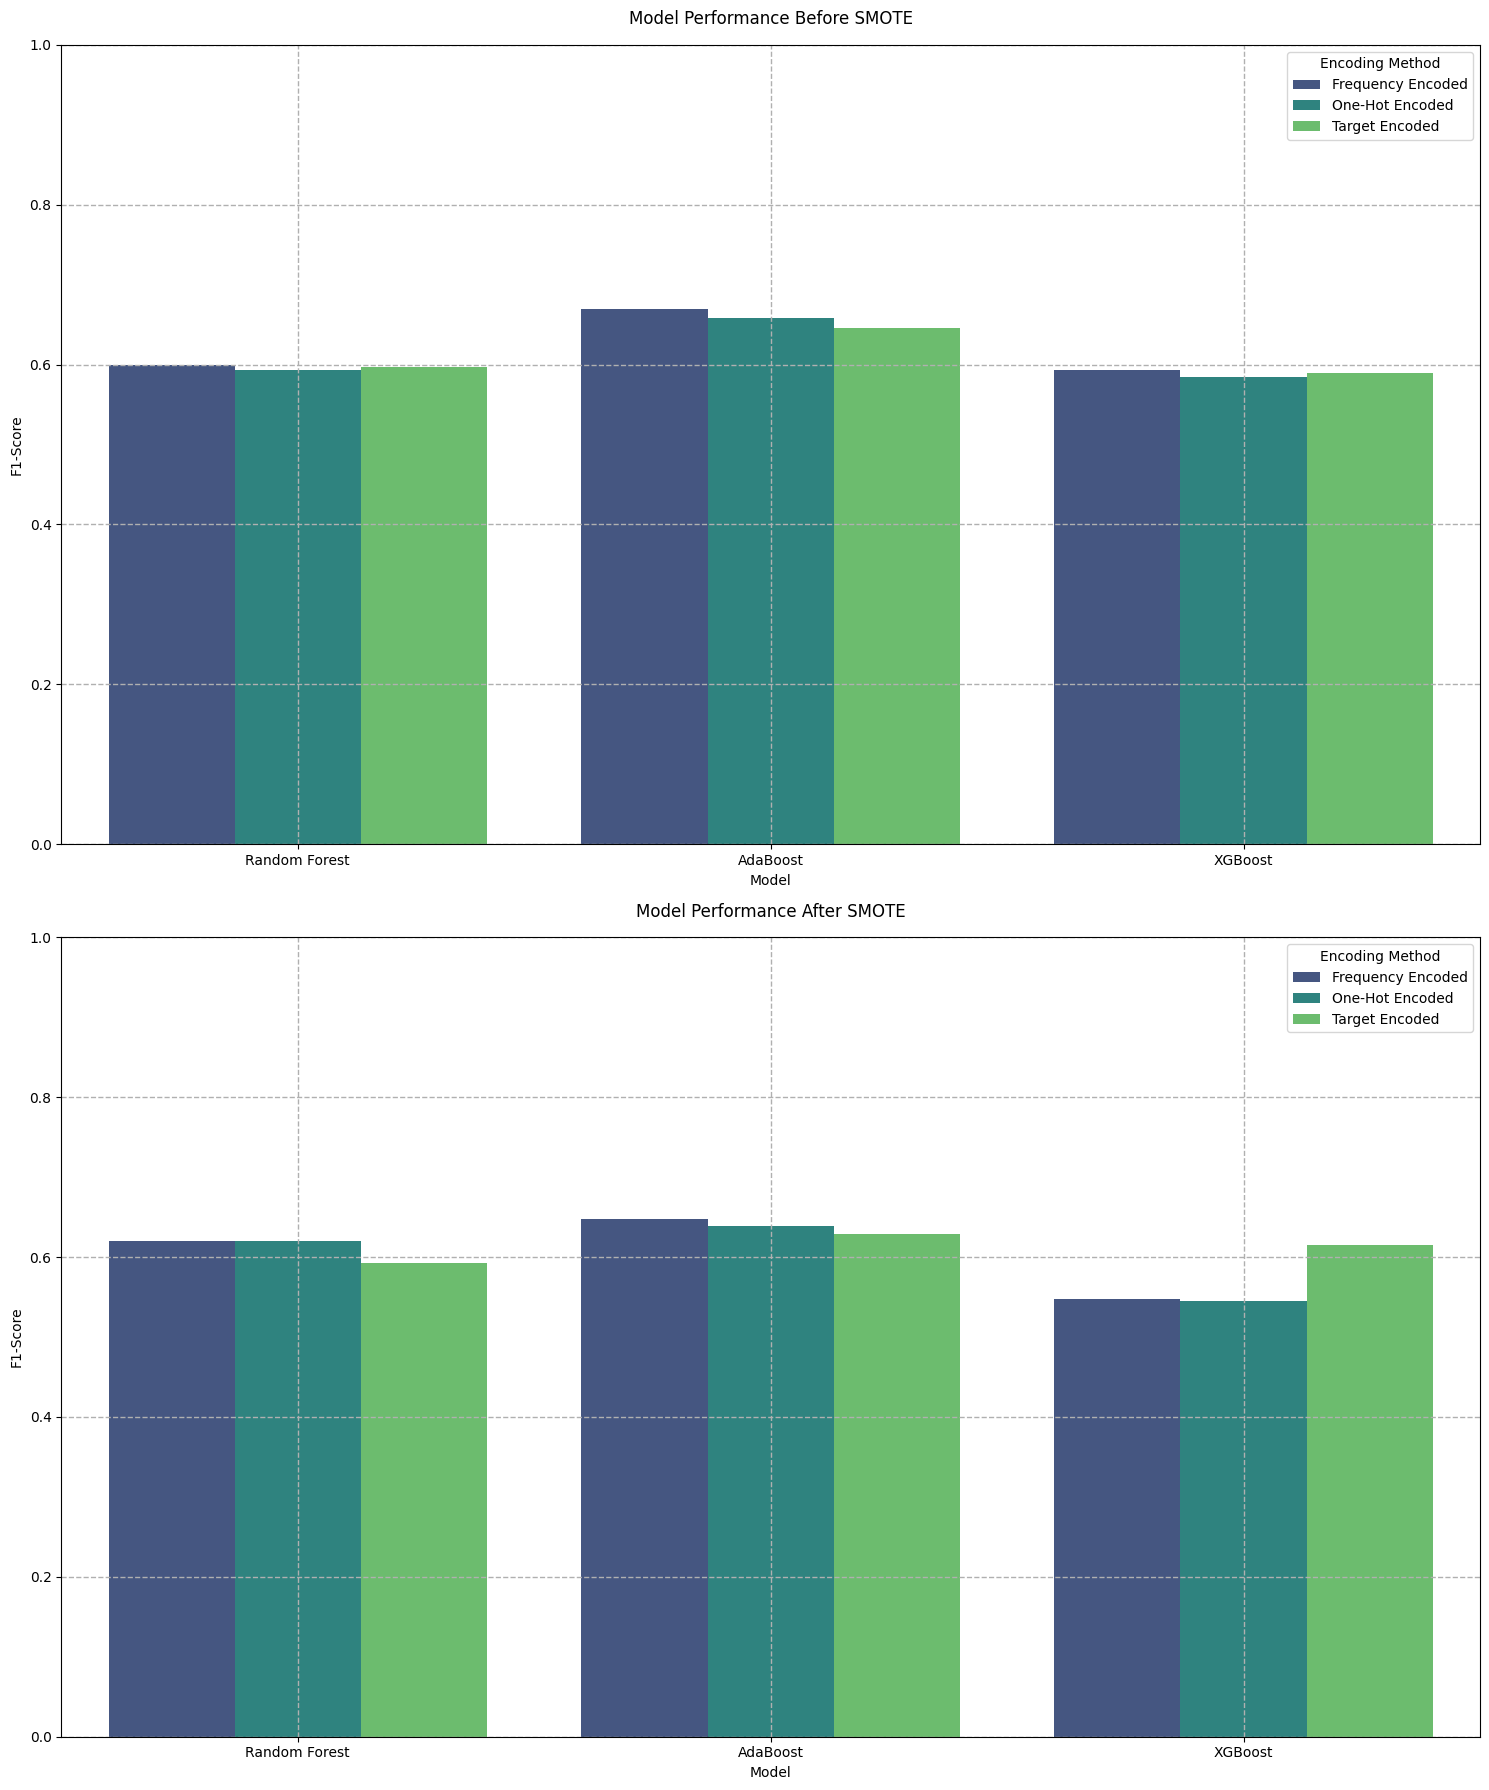


Top 5 performing combinations:
       Model           Encoding         SMOTE  F1-Score
2   AdaBoost  Frequency Encoded  before smote  0.669719
8   AdaBoost    One-Hot Encoded  before smote  0.658582
3   AdaBoost  Frequency Encoded   after smote  0.647330
14  AdaBoost     Target Encoded  before smote  0.645838
9   AdaBoost    One-Hot Encoded   after smote  0.639408


In [23]:
# Prepare data for plotting
plot_data = []
for encoding in ['Frequency Encoded', 'One-Hot Encoded', 'Target Encoded']:
    for model_name in ['Random Forest', 'AdaBoost', 'XGBoost']:
        for smote_status in ['before smote', 'after smote']:
            f1 = results[encoding][model_name][smote_status]['f1_score(CV)']
            plot_data.append({
                'Encoding': encoding,
                'Model': model_name,
                'SMOTE': smote_status,
                'F1-Score': f1
            })

df_plot = pd.DataFrame(plot_data)

# Create subplot for visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 18))

# Plot for before SMOTE
sns.barplot(
    data=df_plot[df_plot['SMOTE'] == 'before smote'],
    x='Model',
    y='F1-Score',
    hue='Encoding',
    palette='viridis',
    ax=ax1
)
ax1.set_title('Model Performance Before SMOTE', fontsize=12, pad=15)
ax1.set_ylim(0, 1)
ax1.grid(visible=True, which='both', linestyle='--', linewidth=1, alpha=1)
ax1.legend(title='Encoding Method', loc='best')

# Plot for after SMOTE
sns.barplot(
    data=df_plot[df_plot['SMOTE'] == 'after smote'],
    x='Model',
    y='F1-Score',
    hue='Encoding',
    palette='viridis',
    ax=ax2
)
ax2.set_title('Model Performance After SMOTE', fontsize=12, pad=15)
ax2.set_ylim(0, 1)
ax2.grid(visible=True, which='both', linestyle='--', linewidth=1, alpha=1)
ax2.legend(title='Encoding Method', loc='best')

plt.tight_layout()
plt.show()

# Display top performing combinations
print("\nTop 5 performing combinations:")
print(df_plot.sort_values('F1-Score', ascending=False)[['Model', 'Encoding', 'SMOTE', 'F1-Score']].head())

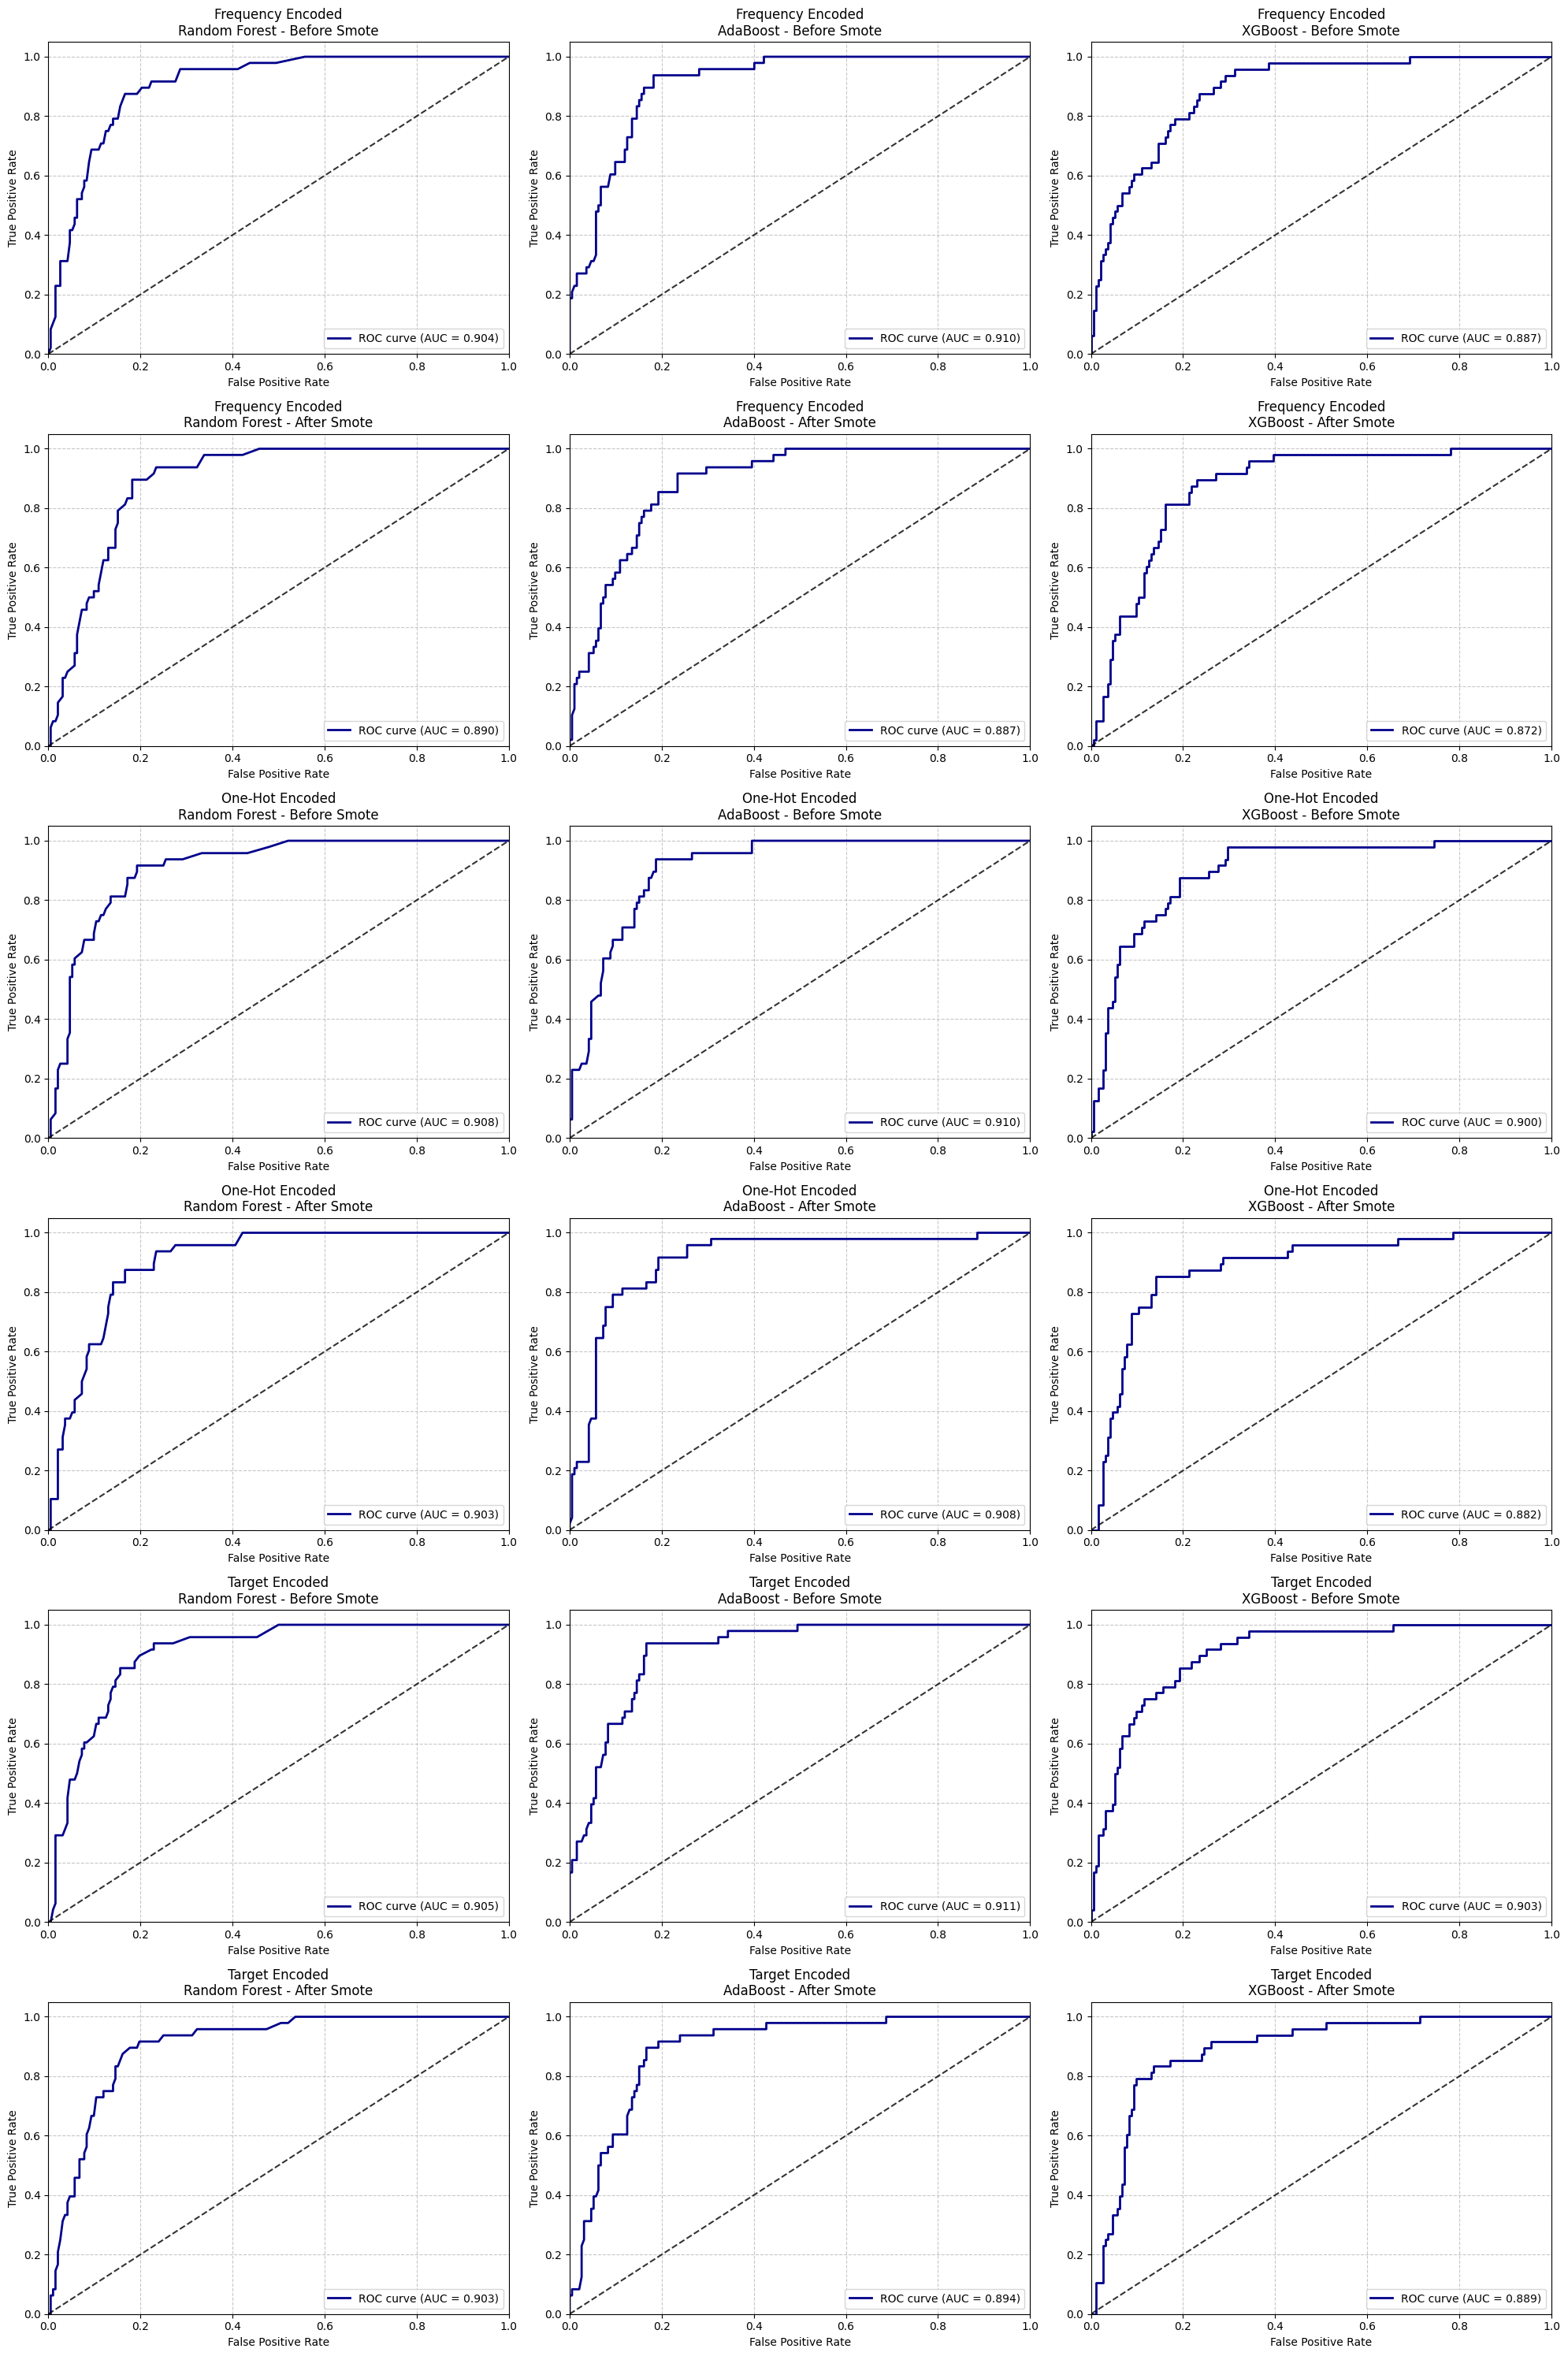

In [24]:
# Create a figure with subplots (6 rows × 3 columns)
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

# Use a built-in style
plt.style.use('default')

# Flatten axes for easier indexing
axes_flat = axes.flatten()

# Plot ROC curves
plot_idx = 0
for encoding in ['Frequency Encoded', 'One-Hot Encoded', 'Target Encoded']:
    for smote_status in ['before smote', 'after smote']:
        for model_name in ['Random Forest', 'AdaBoost', 'XGBoost']:
            ax = axes_flat[plot_idx]
            
            # Get predictions and true values
            y_test = results[encoding][model_name][smote_status]['y_test']
            
            y_pred_proba = results[encoding][model_name][smote_status]['y_proba']
            
            # Calculate ROC curve and AUC
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            
            # Plot ROC curve
            ax.plot(fpr, tpr, color='darkblue', linewidth=2,
                   label=f'ROC curve (AUC = {roc_auc:.3f})')
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.8)
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(f'{encoding}\n{model_name} - {smote_status.title()}')
            ax.legend(loc='lower right')
            
            plot_idx += 1

plt.tight_layout()
plt.show()


In [25]:
for encoding, models in results.items():
    print(f"Encoding Method: {encoding}")
    for model_name, metrics in models.items():
        print(f"  Model: {model_name}")
        for smote_status, scores in metrics.items():
            print(f"    {smote_status.capitalize()}: F1-Score = {scores['f1_score(CV)']:.4f}")

Encoding Method: Frequency Encoded
  Model: Random Forest
    Before smote: F1-Score = 0.6001
    After smote: F1-Score = 0.6200
  Model: AdaBoost
    Before smote: F1-Score = 0.6697
    After smote: F1-Score = 0.6473
  Model: XGBoost
    Before smote: F1-Score = 0.5930
    After smote: F1-Score = 0.5470
Encoding Method: One-Hot Encoded
  Model: Random Forest
    Before smote: F1-Score = 0.5930
    After smote: F1-Score = 0.6198
  Model: AdaBoost
    Before smote: F1-Score = 0.6586
    After smote: F1-Score = 0.6394
  Model: XGBoost
    Before smote: F1-Score = 0.5850
    After smote: F1-Score = 0.5454
Encoding Method: Target Encoded
  Model: Random Forest
    Before smote: F1-Score = 0.5971
    After smote: F1-Score = 0.5927
  Model: AdaBoost
    Before smote: F1-Score = 0.6458
    After smote: F1-Score = 0.6293
  Model: XGBoost
    Before smote: F1-Score = 0.5893
    After smote: F1-Score = 0.6149
